# Voice Classification Tutorial using TensorFlow and Keras

### Part 0: Introduction

We will walk you through the detailed process of creating a powerful voice recognition model using TensorFlow and Keras.

The aim is to classify spoken commands into different categories.

We'll cover various aspects, including data acquisition, preprocessing, model development, training, evaluation, and inference.

Additionally, we'll delve into troubleshooting common issues and exploring advanced concepts.

ما شما رو از طریق فرآیند دقیق ایجاد یک مدل تشخیص صدای قدرتمند با استفاده از TensorFlow و Keras راهنمایی میکنیم.

هدف این است که دستورات گفتاری رو به دسته های مختلف طبقه بندی کنیم.

ما جنبه های مختلفی از جمله جمع آوری داده ها، پیش پردازش، توسعه مدل، آموزش، ارزیابی و استنتاج رو پوشش میدیم.

علاوه بر این، ما به عیب‌یابی مشکلات رایج و کشف مفاهیم پیشرفته میپردازیم.

### Part 1: Importing Libraries and Dataset Preparation

In [ ]:
import os
import pathlib
import numpy as np
import seaborn as sns
import tensorflow as tf
from IPython import display
from keras.layers import Conv2D, Flatten, Dense, MaxPooling2D, Dropout, Resizing, Input, Normalization
from keras import models
from keras.models import Sequential
import matplotlib.pyplot as plt


%matplotlib widget
%matplotlib inline

`import os`: Operating system-dependent functionality is imported, allowing interaction with the file system.

`import pathlib`: The pathlib module provides an object-oriented interface for working with filesystem paths.

`import numpy as np`: NumPy is imported as 'np,' which is a popular numerical computing library in Python.

`import seaborn as sns`: Seaborn is a statistical data visualization library based on Matplotlib, providing an aesthetically pleasing and informative visualization.

`import tensorflow as tf`: TensorFlow, an open-source machine learning framework, is imported.

`from keras.layers import Conv2D, Flatten, Dense, MaxPooling2D, Dropout, Resizing, Input, Normalization`: Various layers from the Keras library are imported. These layers are building blocks for constructing neural networks.

`from keras import models`: The 'models' module from Keras is imported to build neural network models.

`from keras.models import Sequential`: The 'Sequential' model from Keras is imported, which allows the creation of a linear stack of layers.

`import matplotlib.pyplot as plt`: Matplotlib, a 2D plotting library, is imported for data visualization.

`from IPython import display`: The 'display' module from IPython is imported, which can be used for multimedia display capabilities in Jupyter notebooks.

`import os`: این کتابخانه امکانات وابسته به سیستم عامل رو وارد میکنه و این امکان رو فراهم میکنه که با سیستم فایل ارتباط برقرار کنیم.

`import pathlib`: ماژول pathlib یک رابط شی‌گرا برای کار با مسیرهای فایل سیستم فایل فراهم میکنه.

`import numpy as np`: NumPy به عنوان 'np' وارد میشه که یک کتابخانه محاسبات عددی محبوب در پایتون به حساب میاد.

`import seaborn as sns`: Seaborn یک کتابخانه تصویرسازی داده‌های آماریه که بر پایه Matplotlib هست و توانایی تصویرسازی زیبا در کنار اطلاعات رو فراهم میکنه.

`import tensorflow as tf`: TensorFlow، یک چارچوب یادگیری ماشین اپن سورس به حساب میاد.

`from keras.layers import Conv2D, Flatten, Dense, MaxPooling2D, Dropout, Resizing, Input, Normalization`: لایه‌های مختلف از کتابخانه Keras وارد میشن. این لایه‌ها بلوک‌های سازنده برای ساخت شبکه‌های عصبی هستن.

`from keras import models`: ماژول 'models' از Keras وارد میشه تا بتونیم مدل‌های شبکه عصبی بسازیم.

`from keras.models import Sequential`: ماژول 'Sequential' از Keras وارد میشه که امکان ایجاد یک گروه line از لایه‌ها رو فراهم کنه.

`import matplotlib.pyplot as plt`: Matplotlib، یک کتابخانه رسم نمودار 2D، برای تصویرسازی داده‌ها وارد میشه.

`from IPython import display`: ماژول 'display' از IPython وارد میشه که از امکانات نمایش چندرسانه‌ای در دفترچه یادداشت Jupyter استفاده کنه.

In [3]:
DATASET_PATH = 'data/'

data_dir = pathlib.Path(DATASET_PATH)


tf.keras.utils.get_file(
    'voicedataset.zip',
    origin="http://aiolearn.com/dl/datasets/voicedata.zip",
    extract=True,
    cache_dir='.', cache_subdir='data')

print("DONE!")

DONE!


`DATASET_PATH = 'data/'`: The variable DATASET_PATH is assigned the value 'data/' as the path where the dataset will be stored.

`data_dir = pathlib.Path(DATASET_PATH)`: A Path object from the pathlib module is created using the dataset path.

`tf.keras.utils.get_file(...)`: The get_file function from TensorFlow's Keras utilities is used to download a dataset file. It takes parameters like the filename, origin (URL to download from), and extraction settings.

`'voicedataset.zip'`: The desired filename for the downloaded dataset.

`origin="http://aiolearn.com/dl/datasets/voicedata.zip"`: The URL from which the dataset will be downloaded.

`extract=True`: The downloaded file will be extracted.

`cache_dir='.', cache_subdir='data'`: The downloaded file will be cached in the 'data' directory.

`print("DONE!")`: A simple print statement indicating that the dataset download and extraction process is complete.

`DATASET_PATH = 'data/'`: متغیر DATASET_PATH مقدار 'data/' رو به عنوان مسیری که مجموعه داده در اون ذخیره میشه دریافت میکنه.

`data_dir = pathlib.Path(DATASET_PATH)`: یک شیء Path از ماژول pathlib با استفاده از مسیر مجموعه داده ایجاد میشه.

`tf.keras.utils.get_file(...)`: تابع get_file از ابزار Keras TensorFlow برای دانلود یک فایل مجموعه داده استفاده میشه. این تابع پارامترهایی مثل نام فایل، منبع (آدرس اینترنتی برای دانلود) و تنظیمات استخراج رو میگیره.

`'voicedataset.zip'`: نام فایل مجموعه داده دانلودی.

`origin="http://aiolearn.com/dl/datasets/voicedata.zip"`: آدرس اینترنتی از کجا مجموعه داده دانلود میشه.

`extract=True`: فایل دانلودی استخراج بشه.

`cache_dir='.', cache_subdir='data'`: فایل دانلودی در دایرکتوری 'data' ذخیره بشه.

`print("DONE!")`: به کاربر اطلاع میده فرایند تموم شده.

### Part 2: Data Exploration and Preprocessing

In [4]:
tf.io.gfile.listdir(str(data_dir))

['down',
 'go',
 'left',
 'no',
 'README.md',
 'right',
 'stop',
 'up',
 'voicedataset.zip',
 'yes']

`tf.io.gfile.listdir(...)`: This TensorFlow function is used to list the files and subdirectories in the specified directory.

`str(data_dir)`: Converts the data_dir object (which is a Path object) to a string representing the dataset directory path.
The result is a list of files and subdirectories present in the dataset directory.

`tf.io.gfile.listdir(...)`: این تابع TensorFlow برای فهرست کردن فایل‌ها و زیر شاخه‌ها در دایرکتوری مشخص شده استفاده میشه.

`str(data_dir)`: شی data_dir (که یک شی Path هست) را به رشته ای تبدیل می کنه که مسیر فهرست مجموعه داده رو نشون می ده.
نتیجه لیستی از فایل ها و زیر شاخه های موجود در فهرست مجموعه داده هست.

In [5]:
commands = np.array(tf.io.gfile.listdir(str(data_dir)))
commands = commands[(commands != 'README.md') & (commands != '.DS_Store') & (commands != 'voicedataset.zip')]
print('Commands Available:', commands)

Commands Available: ['down' 'go' 'left' 'no' 'right' 'stop' 'up' 'yes']


`commands = np.array(tf.io.gfile.listdir(str(data_dir)))`: The list of files and subdirectories in the dataset directory is converted into a NumPy array and stored in the variable commands.

`commands = commands[(commands != 'README.md') & (commands != '.DS_Store') & (commands != 'voicedataset.zip')]`: Filtering out unwanted items from the list. In this case, it excludes files like 'README.md,' '.DS_Store,' and 'voicedataset.zip.'

`print('Commands Available:', commands)`: Printing the final list of available commands (files or subdirectories) in the dataset directory.

`commands = np.array(tf.io.gfile.listdir(str(data_dir)))`: لیست فایل‌ها و زیرشاخه‌های موجود داخل دایرکتوری مجموعه داده به یک آرایه NumPy تبدیل شده و در متغیر commands ذخیره میشه.

`commands = commands[(commands != 'README.md') & (commands != '.DS_Store') & (commands != 'voicedataset.zip')]`: حذف موارد ناخواسته از لیست. در این حالت، فایل‌هایی مثل 'README.md'، '.DS_Store' و 'voicedataset.zip' از لیست حذف میشن.

`print('Commands Available:', commands)`: نمایش لیست نهایی دستورات موجود (فایل‌ها یا زیرشاخه‌ها) داخل دایرکتوری مجموعه داده.

In [6]:
X_train, X_test = tf.keras.utils.audio_dataset_from_directory(
    
    directory=data_dir,
    batch_size=64,
    validation_split=0.2,
    seed=0,
    output_sequence_length=16000,
    subset='both')

label_names = np.array(X_train.class_names)
print()
print("label :", label_names)

Found 8000 files belonging to 8 classes.
Using 6400 files for training.
Using 1600 files for validation.

label : ['down' 'go' 'left' 'no' 'right' 'stop' 'up' 'yes']


`tf.keras.utils.audio_dataset_from_directory(...)`: This function creates an audio dataset from the specified directory. Parameters include:

`directory=data_dir`: The directory containing the audio files.

`batch_size=64`: The number of audio samples to include in each batch.

`validation_split=0.2`: The fraction of data to reserve for validation.

`seed=0`: Random seed for reproducibility.

`output_sequence_length=16000`: The length of the output audio sequences.

`subset='both'`: Both training and validation subsets are created.

`label_names = np.array(X_train.class_names)`: The class names (labels) are extracted from the training dataset and converted into a NumPy array.

`print()`: A newline for better readability.

`print("label :", label_names)`: Printing the extracted class names.

`tf.keras.utils.audio_dataset_from_directory(...)`: این تابع یک مجموعه داده صوتی از دایرکتوری مشخص شده ایجاد میکنه. پارامترها شامل:

`directory=data_dir`: دایرکتوری حاوی فایل‌های صوتی.

`batch_size=64`: تعداد نمونه‌های صوتی که در هر دسته قرار میگیرن.

`validation_split=0.2`: نسبت داده‌ها که برای اعتبارسنجی رزرو میشن.

`seed=0`: دانه تصادفی برای قابلیت تکرار.

`output_sequence_length=16000`: طول دنباله خروجی صدا.

`subset='both'`: هر دو زیرمجموعه آموزش و اعتبارسنجی ایجاد میشن.

`label_names = np.array(X_train.class_names)`: نام‌های کلاس (برچسب‌ها) از مجموعه داده آموزش استخراج شده و به یک آرایه NumPy تبدیل میشن.

`print()`: یک خط جدید برای خوانایی بهتر.

`print("label :", label_names)`: نمایش نام‌های کلاس استخراج شده.

### Part 3: Data Preprocessing and Exploration

In [7]:
def squeeze(audio, labels):
  audio = tf.squeeze(audio, axis=-1)
  return audio, labels

X_train = X_train.map(squeeze, tf.data.AUTOTUNE)
X_test = X_test.map(squeeze, tf.data.AUTOTUNE)

`def squeeze(audio, labels)`: A function named squeeze is defined, which takes audio and labels as input parameters.

`audio = tf.squeeze(audio, axis=-1)`: The tf.squeeze function is used to remove dimensions of size 1 from the shape of the audio tensor. This is done along the last axis (axis=-1).

`return audio, labels`: The modified audio tensor and the original labels are returned from the function.

`X_train = X_train.map(squeeze, tf.data.AUTOTUNE)`: The squeeze function is applied to each element of the training dataset using the map method. The tf.data.AUTOTUNE parameter optimizes the mapping process based on available computational resources.

`X_test = X_test.map(squeeze, tf.data.AUTOTUNE)`: Similarly, the squeeze function is applied to each element of the testing dataset.

`def squeeze(audio, labels)`: یک تابع با نام squeeze تعریف میشه که audio و labels رو به عنوان پارامترهای ورودی قبول میکنه.

`audio = tf.squeeze(audio, axis=-1)`: تابع tf.squeeze برای حذف ابعاد با اندازه 1 از شکل تنسور audio استفاده میشه. این به ازای آخرین محور انجام میشه (axis=-1).

`return audio, labels`: تنسور صوتی تغییر یافته و برچسب‌های اصلی از تابع برمیگردن.

`X_train = X_train.map(squeeze, tf.data.AUTOTUNE)`: تابع squeeze برای هر عنصر از مجموعه داده آموزش با استفاده از متد map اعمال میشه. پارامتر tf.data.AUTOTUNE بهینه‌سازی فرآیند نگاشت بر اساس منابع محاسباتی موجود رو فراهم میکنه.

`X_test = X_test.map(squeeze, tf.data.AUTOTUNE)`: به همین ترتیب، تابع squeeze برای هر عنصر از مجموعه داده آزمایشی اعمال میشه.

In [8]:
X_train.element_spec

(TensorSpec(shape=(None, 16000), dtype=tf.float32, name=None),
 TensorSpec(shape=(None,), dtype=tf.int32, name=None))

`X_train.element_spec`: This attribute provides information about the structure and types of elements present in the X_train dataset.

The output typically includes information about the types of elements in a single batch, which can include the audio tensor and its corresponding labels.

X_train.element_spec: این ویژگی اطلاعاتی در مورد ساختار و انواع عناصر موجود در مجموعه داده X_train ارائه میده.

خروجی معمولاً شامل اطلاعاتی در مورد انواع عناصر در یک دسته است که ممکن است تنسور صوتی و برچسب‌های متناظر اون باشه.

In [9]:
val = X_test
X_test = X_test.shard(num_shards=2, index=0)
val = X_test.shard(num_shards=2, index=1)

`val = X_test`: The variable val is assigned the value of X_test, creating a reference to the original X_test dataset.

`X_test = X_test.shard(num_shards=2, index=0)`: The X_test dataset is sharded into two parts (num_shards=2). Here, the subset with index=0 is selected.

`val = X_test.shard(num_shards=2, index=1)`: The second part of the sharded dataset (with index=1) is assigned to the variable val.

`val = X_test`: متغیر val مقدار X_test رو دریافت میکنه و یک مرجع به مجموعه داده اصلی X_test ایجاد میشه.

`X_test = X_test.shard(num_shards=2, index=0)`: مجموعه داده X_test به دو بخش (num_shards=2) شارد میشه. در اینجا، زیرمجموعه با index=0 انتخاب میشه.

`val = X_test.shard(num_shards=2, index=1)`: بخش دوم از مجموعه داده شارده (با index=1) به متغیر val اختصاص داده میشه.

In [10]:
for x, y in X_train.take(1):  
  print(x)
  print(label_names[y])

tf.Tensor(
[[ 1.4648438e-03  4.5776367e-03  2.9602051e-03 ...  3.2653809e-03
   2.5634766e-03  3.6926270e-03]
 [ 6.9885254e-03  5.8898926e-03  6.7749023e-03 ...  9.4604492e-03
   8.2092285e-03  8.0566406e-03]
 [ 0.0000000e+00  8.5449219e-04 -3.9672852e-04 ...  3.7231445e-03
  -1.2817383e-03 -3.2043457e-03]
 ...
 [-1.3122559e-03 -1.6174316e-03 -2.5329590e-03 ... -2.9602051e-03
  -2.7770996e-03 -2.4719238e-03]
 [ 6.1035156e-05  3.0517578e-05 -3.0517578e-05 ... -1.5258789e-04
   3.0517578e-05  2.1362305e-04]
 [-3.0517578e-04 -2.2277832e-03 -2.8686523e-03 ... -3.0517578e-05
   2.7465820e-04  1.0375977e-03]], shape=(64, 16000), dtype=float32)
['down' 'go' 'right' 'no' 'down' 'left' 'yes' 'go' 'stop' 'go' 'left' 'up'
 'down' 'left' 'left' 'down' 'down' 'down' 'go' 'no' 'yes' 'right' 'up'
 'down' 'down' 'no' 'up' 'up' 'go' 'yes' 'yes' 'no' 'stop' 'stop' 'up'
 'go' 'right' 'stop' 'left' 'down' 'no' 'down' 'down' 'up' 'no' 'down'
 'down' 'go' 'stop' 'yes' 'no' 'stop' 'up' 'stop' 'right' 'go' 'y

`for x, y in X_train.take(1):`: This loop iterates over the first batch of the X_train dataset.

`print(x)`: Prints the audio tensor of the first element in the batch.

`print(label_names[y])`: Prints the label corresponding to the first element in the batch using the label_names array.

`for x, y in X_train.take(1):`: این حلقه بر روی اولین دسته از مجموعه داده X_train حرکت میکنه.

`print(x)`: تنسور صوتی اولین عنصر در دسته رو نمایش میده.

`print(label_names[y])`: برچسب متناظر با اولین عنصر در دسته با استفاده از آرایه label_names نمایش داده میشه.

In [11]:
for example_audio, example_labels in X_train.take(1):
  print(example_audio.shape)
  print(example_labels.shape)

(64, 16000)
(64,)


`for example_audio, example_labels in X_train.take(1):`: This loop iterates over the first batch of the X_train dataset, providing access to the audio tensors (example_audio) and their labels (example_labels).

`print(example_audio.shape)`: Prints the shape of the audio tensor, giving information about its dimensions.

`print(example_labels.shape)`: Prints the shape of the labels tensor, indicating the structure of the labels.

`for example_audio, example_labels in X_train.take(1):`: این حلقه بر روی اولین دسته از مجموعه داده X_train حرکت میکنه و دسترسی به تنسورهای صوتی (example_audio) و برچسب‌های متناظر (example_labels) رو فراهم میکنه.

`print(example_audio.shape)`: ابعاد تنسور صوتی رو نمایش میده و اطلاعاتی درباره ابعاد اون ارائه می‌ده.

`print(example_labels.shape)`: ابعاد تنسور برچسب‌ها رو نمایش میده و ساختار برچسب‌ها رو نشون میده.

### Part 4: Audio Data Visualization and Feature Extraction

In [12]:
print(label_names[[0,1,2]])
print(example_audio[0][5100])

['down' 'go' 'left']
tf.Tensor(-0.0009460449, shape=(), dtype=float32)


`print(label_names[[0,1,2]])`: Prints specific elements from the label_names array. Here, it prints elements at indices 0, 1, and 2.

`print(example_audio[0][5100])`: Prints the value at index 5100 in the audio tensor of the first element in the batch.

`print(label_names[[0,1,2]])`: عناصر خاصی از آرایه label_names رو نمایش میده. در اینجا، عناصر با شاخص‌های 0، 1 و 2 نمایش داده میشن.

`print(example_audio[0][5100])`: مقدار موجود در شاخص 5100 تنسور صوتی اولین عنصر در دسته رو نمایش میده.

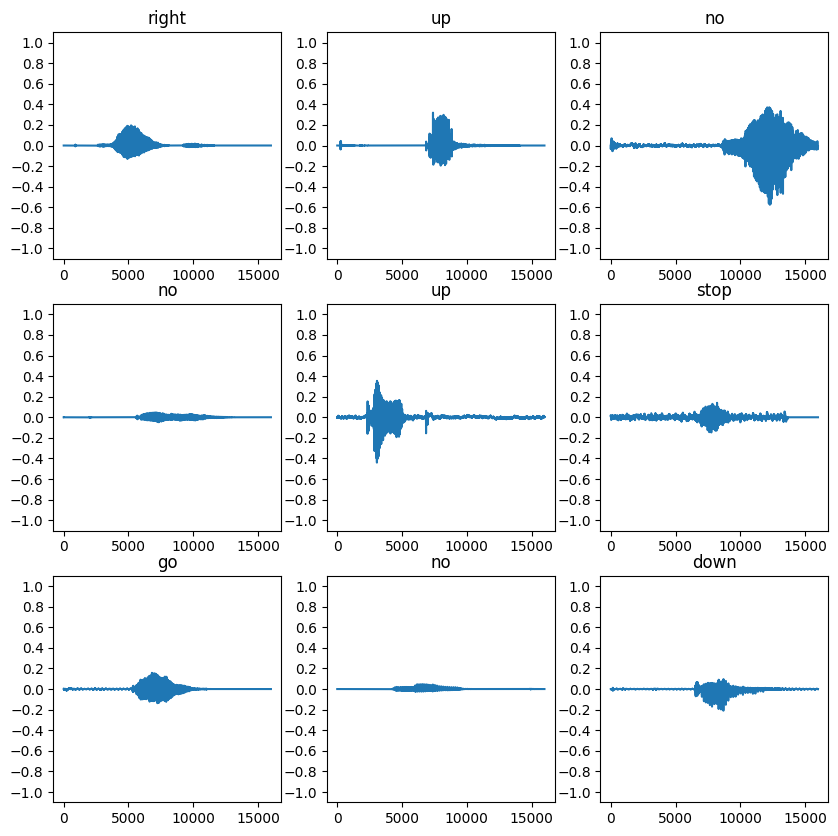

In [13]:
plt.figure(figsize=(10, 10))
rows = 3
cols = 3
n = rows * cols
for i in range(n):
  plt.subplot(rows, cols, i+1)
  audio_signal = example_audio[i]
  plt.plot(audio_signal)
  plt.title(label_names[example_labels[i]])
  plt.yticks(np.arange(-1.2, 1.2, 0.2))
  plt.ylim([-1.1, 1.1])

`plt.figure(figsize=(10, 10))`: Creates a figure with a specified size for the upcoming subplot grid.

`rows = 3, cols = 3`: Defines the number of rows and columns for the subplot grid.

`n = rows * cols`: Calculates the total number of subplots.

The loop iterates over each subplot, plotting the audio signal and setting the title with the corresponding label.

`plt.subplot(rows, cols, i+1)`: Specifies the position of the current subplot in the grid.

`plt.plot(audio_signal)`: Plots the audio signal.

`plt.title(label_names[example_labels[i]])`: Sets the title of the subplot using the label corresponding to the audio signal.

`plt.yticks(np.arange(-1.2, 1.2, 0.2))`: Sets y-axis ticks.

`plt.ylim([-1.1, 1.1])`: Sets the y-axis limit.

`plt.figure(figsize=(10, 10))`: یک شکل با اندازه مشخص برای گرید زیرنمودهای بعدی ایجاد میکنه.

`rows = 3، cols = 3`: تعداد سطرها و ستون‌ها برای گرید زیرنمودها رو مشخص میکنه.

`n = rows * cols`: تعداد کل زیرنمودها رو محاسبه میکنه.

حلقه بر روی هر زیرنموده حرکت می‌کنه و سیگنال صوتی رو نمایش می‌ده و عنوان اون رو با برچسب متناظر تنظیم میکنه.

`plt.subplot(rows, cols, i+1)`: موقعیت زیرنموده فعلی در گرید رو مشخص می‌کنه.

`plt.plot(audio_signal)`: سیگنال صوتی رو نمایش میده.

`plt.title(label_names[example_labels[i]])`: عنوان زیرنموده رو با استفاده از برچسب متناظر با سیگنال صوتی تنظیم میکنه.

`plt.yticks(np.arange(-1.2, 1.2, 0.2))`: علامت‌گذاری محور y رو تنظیم میکنه.

`plt.ylim([-1.1, 1.1])`: حد محور y رو تنظیم میکنه.

In [14]:
def get_spectrogram(waveform):
  # Convert the waveform to a spectrogram via an STFT.
  spectrogram = tf.signal.stft(
      waveform, frame_length=255, frame_step=128)
  # Obtain the magnitude of the STFT.
  spectrogram = tf.abs(spectrogram)
  # Add a `channels` dimension, so that the spectrogram can be used
  # as image-like input data with convolution layers (which expect
  # shape (`batch_size`, `height`, `width`, `channels`).
  spectrogram = spectrogram[..., tf.newaxis]
  return spectrogram

`tf.signal.stft`: This function performs the Short-Time Fourier Transform (STFT) on the input waveform, converting it into a spectrogram.

`frame_length=255, frame_step=128`: Parameters specifying the frame length and step size for STFT.

`tf.abs(spectrogram)`: Takes the magnitude of the STFT to obtain the spectrogram.

`spectrogram[..., tf.newaxis]`: Adds a new dimension at the end, representing the 'channels' dimension, making it suitable for convolutional layers.

The function returns the spectrogram.

`tf.signal.stft`: این تابع تبدیل Short-Time Fourier Transform (STFT) رو روی موج شکل ورودی انجام می‌ده و اون رو به یک اسپکتروگرام تبدیل میکنه.

`frame_length=255, frame_step=128`: پارامترهای تعیین کننده طول فریم و اندازه گام برای STFT.

`tf.abs(spectrogram)`: مقدار مطلق STFT رو گرفته و اسپکتروگرام رو به دست میاره.

`spectrogram[..., tf.newaxis]`: یک بعد جدید در آخر اضافه می‌کنه که بعنوان بعد 'channels' عمل می‌کنه و اسپکتروگرام رو برای لایه‌های کانولوشنی مناسب میکنه.

تابع اسپکتروگرام رو برمیگردونه.

In [15]:
for i in range(3):
  label = label_names[example_labels[i]]
  waveform = example_audio[i]
  spectrogram = get_spectrogram(waveform)

  print('Label:', label)
  print('Waveform shape:', waveform.shape)
  print('Spectrogram shape:', spectrogram.shape)
  print('Audio playback')
  display.display(display.Audio(waveform, rate=16000))

Label: right
Waveform shape: (16000,)
Spectrogram shape: (124, 129, 1)
Audio playback


Label: up
Waveform shape: (16000,)
Spectrogram shape: (124, 129, 1)
Audio playback


Label: no
Waveform shape: (16000,)
Spectrogram shape: (124, 129, 1)
Audio playback


The loop iterates over three examples from the X_train dataset.

`label_names[example_labels[i]]`: Retrieves the label corresponding to the current example.

`get_spectrogram(waveform)`: Computes the spectrogram of the waveform using the previously defined function.

The print statements provide information about the label, waveform shape, and spectrogram shape.

`display.display(display.Audio(waveform, rate=16000))`: Displays an interactive audio widget for playing back the audio waveform.

حلقه بر روی سه نمونه از مجموعه داده X_train حرکت میکنه.

`label_names[example_labels[i]]`: برچسب متناظر با نمونه فعلی رو دریافت میکنه.

`get_spectrogram(waveform)`: اسپکتروگرام موج شکل رو با استفاده از تابع تعریف شده قبلی محاسبه میکنه.

اظهارنظرهای نمایش اطلاعاتی در مورد برچسب، ابعاد موج شکل و ابعاد اسپکتروگرام رو ارائه میده.

`display.display(display.Audio(waveform, rate=16000))`: یک ویجت صوتی تعاملی رو برای پخش موج شکل صوتی نشون میده.

### Part 5: Spectrogram Data Preparation and Model Building

In [16]:
def plot_spectrogram(spectrogram, ax):
  if len(spectrogram.shape) > 2:
    assert len(spectrogram.shape) == 3
    spectrogram = np.squeeze(spectrogram, axis=-1) 
  log_spec = np.log(spectrogram.T + np.finfo(float).eps)
  height = log_spec.shape[0]
  width = log_spec.shape[1]
  X = np.linspace(0, np.size(spectrogram), num=width, dtype=int)
  Y = range(height)
  ax.pcolormesh(X, Y, log_spec)

The function plot_spectrogram takes a spectrogram and an axis (ax) as inputs.

`if len(spectrogram.shape) > 2:`: Checks if the spectrogram has more than two dimensions.

`assert len(spectrogram.shape) == 3`: Ensures that the spectrogram has three dimensions.

`spectrogram = np.squeeze(spectrogram, axis=-1)`: If the spectrogram has an extra dimension, it is squeezed out.

`log_spec = np.log(spectrogram.T + np.finfo(float).eps)`: Computes the logarithm of the transposed spectrogram to enhance visualization.

`height = log_spec.shape[0], width = log_spec.shape[1]`: Retrieves the height and width of the spectrogram.

`X = np.linspace(0, np.size(spectrogram), num=width, dtype=int)`: Generates a linear space for the x-axis.

`Y = range(height)`: Creates a range for the y-axis.

`ax.pcolormesh(X, Y, log_spec)`: Plots the spectrogram using pseudocolor mesh.

تابع plot_spectrogram یک اسپکتروگرام و یک محور (ax) رو به عنوان ورودی میگیره.

`if len(spectrogram.shape) > 2:`: بررسی میکنه که آیا اسپکتروگرام بیش از دو بعد داره یا خیر.

`assert len(spectrogram.shape) == 3`: اطمینان حاصل میشه که اسپکتروگرام سه بعدی باشه.

`spectrogram = np.squeeze(spectrogram, axis=-1)`: اگر اسپکتروگرام یک بعد اضافه داشته باشه، از بین میره.

`log_spec = np.log(spectrogram.T + np.finfo(float).eps)`: لگاریتم اسپکتروگرام جابجا شده برای افزایش وضوح رو محاسبه میکنه.

`height = log_spec.shape[0]، width = log_spec.shape[1]`: ارتفاع و عرض اسپکتروگرام رو دریافت میکنه.

`X = np.linspace(0, np.size(spectrogram), num=width, dtype=int)`: یک فضای خطی برای محور x ایجاد میکنه.

`Y = range(height)`: یک محدوده برای محور y ایجاد میکنه.

`ax.pcolormesh(X, Y, log_spec)`: اسپکتروگرام رو با استفاده از مش شبه رنگی رسم میکنه.

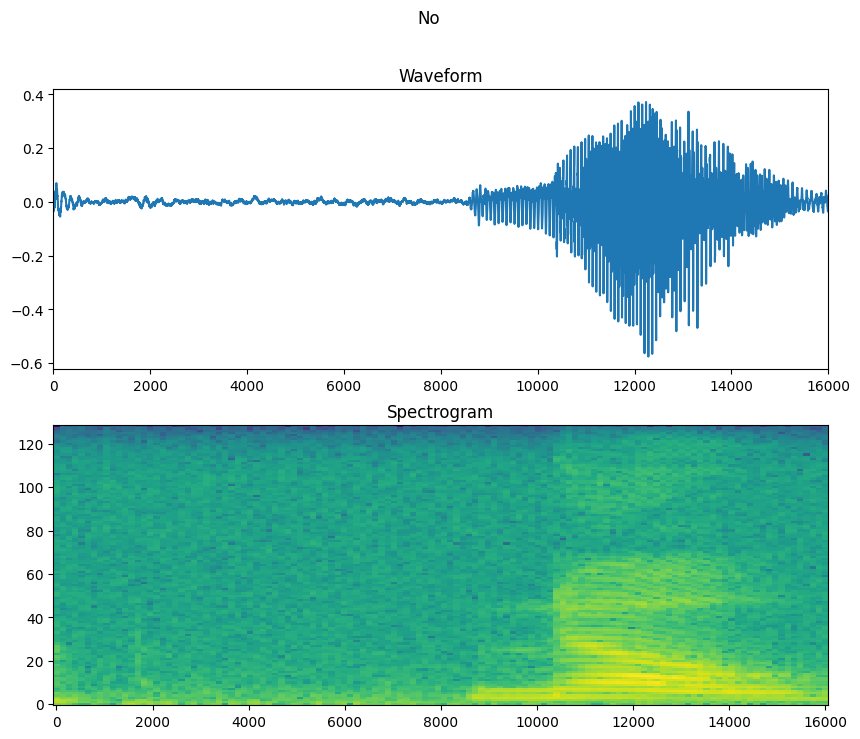

In [17]:
plt.close()
fig, axes = plt.subplots(2, figsize=(10, 8))
timescale = np.arange(waveform.shape[0])
axes[0].plot(timescale, waveform.numpy())
axes[0].set_title('Waveform')
axes[0].set_xlim([0, 16000])

plot_spectrogram(spectrogram.numpy(), axes[1])
axes[1].set_title('Spectrogram')

plt.suptitle(label.title())
plt.show()

display.display(display.Audio(waveform, rate=16000))

`plt.close()`: Closes any existing plots.

`fig, axes = plt.subplots(2, figsize=(10, 8))`: Creates a figure with two subplots.

`timescale = np.arange(waveform.shape[0])`: Generates a timescale array based on the length of the waveform.

`axes[0].plot(timescale, waveform.numpy())`: Plots the waveform on the first subplot.

`axes[0].set_title('Waveform')`: Sets the title for the first subplot.

`xes[0].set_xlim([0, 16000])`: Sets the x-axis limit for the first subplot.

`plot_spectrogram(spectrogram.numpy(), axes[1])`: Calls the previously defined function to plot the spectrogram on the second subplot.

`axes[1].set_title('Spectrogram')`: Sets the title for the second subplot.

`plt.suptitle(label.title())`: Sets the super title (overall title) using the label.

`plt.show()`: Displays the entire plot.

`display.display(display.Audio(waveform, rate=16000))`: Displays an interactive audio widget for playing back the audio waveform.

p`lt.close()`: تمام نمودارهای موجود رو میبنده.

`fig, axes = plt.subplots(2, figsize=(10, 8))`: یک شکل با دو نمودار جزئی ایجاد میکنه.

`timescale = np.arange(waveform.shape[0])`: یک آرایه با مقیاس زمانی بر اساس طول موج شکل ایجاد میکنه.

`axes[0].plot(timescale, waveform.numpy())`: موج شکل رو در نمودار اول رسم میکنه.

`axes[0].set_title('Waveform')`: عنوان نمودار اول رو تنظیم میکنه.

`axes[0].set_xlim([0, 16000])`: حد محور x برای نمودار اول رو تنظیم میکنه.

`plot_spectrogram(spectrogram.numpy(), axes[1])`: تابع تعریف شده قبلی رو صدا می‌زنه تا اسپکتروگرام رو در نمودار دوم رسم کنه.

`axes[1].set_title('Spectrogram')`: عنوان نمودار دوم رو تنظیم میکنه.

`plt.suptitle(label.title())`: عنوان اصلی (عنوان کلی) رو با استفاده از برچسب تنظیم میکنه.

`plt.show()`: تمام نمودار رو نمایش می‌دهد.

`display.display(display.Audio(waveform, rate=16000))`: یک ویجت صوتی تعاملی رو برای پخش موج شکل صوتی نشان می‌ده.

### Part 6: Spectrogram Dataset Preparation, Model Training, and Evaluation

In [18]:
def make_spec_ds(ds):
  return ds.map(
      map_func=lambda audio,label: (get_spectrogram(audio), label),
      num_parallel_calls=tf.data.AUTOTUNE)

The function make_spec_ds takes a dataset (ds) as input.

`ds.map(...)`: Applies a mapping function to each element of the dataset.

`lambda audio,label`: (get_spectrogram(audio), label): The mapping function takes an audio sample and its label, computes the spectrogram using the previously defined function get_spectrogram, and returns a tuple of the spectrogram and the label.

`num_parallel_calls=tf.data.AUTOTUNE`: Enables parallel processing for performance optimization.

The function returns the dataset with spectrogram-label pairs.

تابع make_spec_ds یک مجموعه داده (ds) رو به عنوان ورودی میگیره.

`ds.map(...)`: یک تابع نگاشت رو برای هر عنصر از مجموعه داده اعمال میکنه.

`lambda audio,label`: (get_spectrogram(audio), label): تابع نگاشت یک نمونه صوتی و برچسب آن رو میگیره اسپکتروگرام رو با استفاده از تابع تعریف شده قبلی get_spectrogram محاسبه میکنه و یک دوتای اسپکتروگرام و برچسب رو برمی‌گردونه.

`num_parallel_calls=tf.data.AUTOTUNE`: پردازش موازی رو برای بهینه‌سازی عملکرد فعال میکنه.

تابع مجموعه داده رو با جفت‌های اسپکتروگرام و برچسب برمیگردونه.

In [19]:
train_spectrogram_ds = make_spec_ds(X_train)
val_spectrogram_ds = make_spec_ds(val)
test_spectrogram_ds = make_spec_ds(X_test)

`make_spec_ds(X_train)`: Applies the make_spec_ds function to the training dataset X_train, creating a dataset with spectrogram-label pairs for training.

`make_spec_ds(val)`: Applies the function to the validation dataset val, creating a dataset with spectrogram-label pairs for validation.

`make_spec_ds(X_test)`: Applies the function to the testing dataset X_test, creating a dataset with spectrogram-label pairs for testing.

`make_spec_ds(X_train)`: تابع make_spec_ds رو بر روی مجموعه داده آموزشی X_train اعمال کرده و یک مجموعه داده با جفت‌های اسپکتروگرام و برچسب برای آموزش ایجاد میکنه.

`make_spec_ds(val)`: تابع رو بر روی مجموعه داده اعتبارسنجی val اعمال کرده و یک مجموعه داده با جفت‌های اسپکتروگرام و برچسب برای اعتبارسنجی ایجاد میکنه.

`make_spec_ds(X_test)`: تابع رو بر روی مجموعه داده آزمایشی X_test اعمال کرده و یک مجموعه داده با جفت‌های اسپکتروگرام و برچسب برای آزمایش ایجاد میکنه.

In [20]:
for example_spectrograms, example_spect_labels in train_spectrogram_ds.take(1):
  break

`train_spectrogram_ds.take(1)`: Retrieves one batch (in this case, the first batch) from the training spectrogram dataset.

`for example_spectrograms, example_spect_labels in ...`: Iterates over the retrieved batch.

`break`: Breaks out of the loop after processing the first batch.

`train_spectrogram_ds.take(1)`: یک دسته (در این مورد، اولین دسته) از مجموعه داده اسپکتروگرام آموزشی رو باز میگیره.

`for example_spectrograms, example_spect_labels in ...`: بر روی دسته بازیابی شده حلقه ایجاد میکنه.

`break`: پس از پردازش اولین دسته از حلقه خارج میشه.

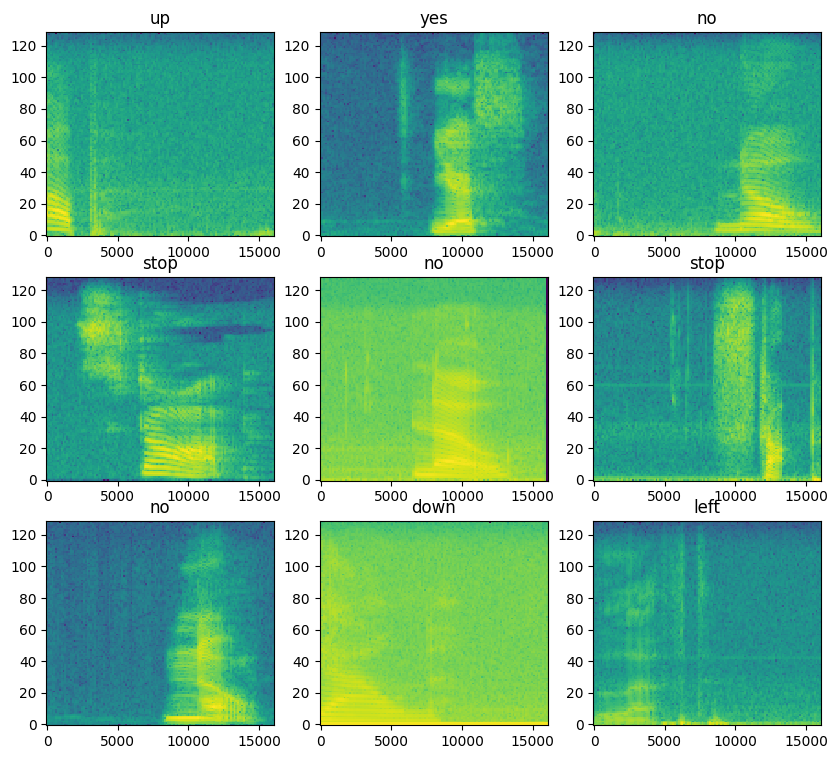

In [21]:
rows = 3
cols = 3
n = rows*cols
fig, axes = plt.subplots(rows, cols, figsize=(10, 9))

for i in range(n):
    r = i // cols
    c = i % cols
    ax = axes[r][c]
    plot_spectrogram(example_spectrograms[i].numpy(), ax)
    ax.set_title(label_names[example_spect_labels[i].numpy()])

plt.show()

`rows = 3, cols = 3`: Defines the number of rows and columns for the grid.

`n = rows*cols`: Calculates the total number of subplots.

`fig, axes = plt.subplots(rows, cols, figsize=(10, 9))`: Creates a grid of subplots.

The loop iterates over the subplots and plots each spectrogram with its corresponding title.

`r = i // cols, c = i % cols`: Computes the row and column indices for the current subplot.

`ax = axes[r][c]`: Selects the current subplot.

`plot_spectrogram(example_spectrograms[i].numpy(), ax)`: Plots the spectrogram on the current subplot.

`ax.set_title(label_names[example_spect_labels[i].numpy()])`: Sets the title of the subplot with the corresponding label.

`plt.show()`: Displays the entire grid of spectrograms.

`rows = 3، cols = 3`: تعداد ردیف‌ها و ستون‌ها برای شبکه رو تعریف میکنه.

`n = rows*cols`: تعداد کل زیرنمودارها رو محاسبه میکنه.

`fig, axes = plt.subplots(rows, cols, figsize=(10, 9))`: یک شبکه از زیرنمودارها ایجاد میکنه.

حلقه بر روی زیرنمودارها حرکت کرده و هر اسپکتروگرام رو به همراه عنوان متناظر اون رسم میکنه.

`r = i // cols، c = i % cols`: شاخص‌های ردیف و ستون رو برای زیرنمودار فعلی محاسبه میکنه.

`ax = axes[r][c]`: زیرنمودار فعلی رو انتخاب میکنه.

`plot_spectrogram(example_spectrograms[i].numpy(), ax)`: اسپکتروگرام رو در زیرنمودار فعلی رسم میکنه.

`ax.set_title(label_names[example_spect_labels[i].numpy()])`: عنوان زیرنمودار رو با برچسب متناظر تنظیم میکنه.

`plt.show()`: تمام شبکه از اسپکتروگرامها رو نمایش میده.

In [22]:
train_spectrogram_ds = train_spectrogram_ds.cache().shuffle(10000).prefetch(tf.data.AUTOTUNE)
val_spectrogram_ds = val_spectrogram_ds.cache().prefetch(tf.data.AUTOTUNE)
test_spectrogram_ds = test_spectrogram_ds.cache().prefetch(tf.data.AUTOTUNE)

`train_spectrogram_ds.cache()`: Caches the training spectrogram dataset, improving data loading speed for subsequent epochs.

`.shuffle(10000)`: Shuffles the training dataset with a buffer size of 10,000. This introduces randomness during training.

`.prefetch(tf.data.AUTOTUNE)`: Prefetches the next batch of data asynchronously, optimizing data loading performance by overlapping it with model training.

Similar operations are applied to the validation and test datasets for consistency.

`train_spectrogram_ds.cache()`: مجموعه داده اسپکتروگرام آموزشی رو کش می‌کند و سرعت بارگیری داده برای ایپوک‌های بعدی رو افزایش میده.

`.shuffle(10000)`: مجموعه داده آموزشی رو با اندازه بافر ۱۰٬۰۰۰ به صورت تصادفی می‌آمیزه. این عامل تصادفی رو در هنگام آموزش معرفی میکنه.

`.prefetch(tf.data.AUTOTUNE)`: دسته بعدی داده رو به صورت ناهمزمان پیش‌بینی میکنه، که با همپوشانی بارگیری داده با آموزش مدل، عملکرد بارگیری داده رو بهینه میکنه.

عملیات‌های مشابه بر روی مجموعه داده‌های اعتبارسنجی و آزمایشی نیز برای یکپارچگی اعمال شده.

In [23]:
example_spectrograms.shape[1:]

TensorShape([124, 129, 1])

`example_spectrograms.shape`: Retrieves the shape of the example_spectrograms tensor.

`.shape[1:]`: Extracts the shape starting from the second dimension (excluding the batch dimension). This is useful for determining the input shape for the neural network.

`example_spectrograms.shape`: شکل تانسور example_spectrograms رو بازیابی میکنه.

`.shape[1:]`: شکل رو از بعد دوم به بعد (به استثنای بُعد دسته) استخراج میکنه. این برای تعیین شکل ورودی شبکه عصبی مفیده.

In [24]:
input_shape = example_spectrograms.shape[1:]
print('Input shape:', input_shape)
num_labels = len(label_names)
 
norm_layer = Normalization() 
norm_layer.adapt(data=train_spectrogram_ds.map(map_func=lambda spec, label: spec))

model = models.Sequential([
    Input(shape=input_shape),
    # Downsample the input.
    Resizing(32, 32),
    # Normalize.
    norm_layer,
    Conv2D(32, 3, activation='relu'),
    Conv2D(64, 3, activation='relu'),
    MaxPooling2D(),
    Dropout(0.25),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(8),
])

model.summary()

Input shape: (124, 129, 1)
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resizing (Resizing)         (None, 32, 32, 1)         0         
                                                                 
 normalization (Normalizati  (None, 32, 32, 1)         3         
 on)                                                             
                                                                 
 conv2d (Conv2D)             (None, 30, 30, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 64)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           

`input_shape = example_spectrograms.shape[1:]`: Retrieves the shape of the spectrogram data from an example batch, excluding the batch dimension. This shape is used as the input shape for the neural network.

`num_labels = len(label_names)`: Determines the number of output labels, which is the number of classes in the classification task.

`norm_layer = Normalization()`: Creates a normalization layer.

`norm_layer.adapt(data=train_spectrogram_ds.map(map_func=lambda spec, label: spec))`: Adapts the normalization layer to the training dataset.

The neural network model is defined using the Sequential API from Keras. It consists of the following layers:

`Input(shape=input_shape)`: Input layer with the determined input shape.

`Resizing(32, 32)`: Downsamples the input to a size of 32x32.

`norm_layer`: Applies normalization to the input data.

`Conv2D(32, 3, activation='relu')`: Convolutional layer with 32 filters and a 3x3 kernel, using ReLU activation.

`Conv2D(64, 3, activation='relu')`: Convolutional layer with 64 filters and a 3x3 kernel, using ReLU activation.

`MaxPooling2D()`: Max pooling layer.

`Dropout(0.25)`: Dropout layer with a dropout rate of 25%.

`Flatten()`: Flattens the output to a 1D array.

`Dense(128, activation='relu')`: Fully connected layer with 128 units and ReLU activation.

`Dropout(0.5)`: Dropout layer with a dropout rate of 50%.

`Dense(8)`: Fully connected layer with 8 units (output layer).

`model.summary()`: Prints a summary of the model architecture.

`input_shape = example_spectrograms.shape[1:]`: شکل داده اسپکتروگرام از یک دسته نمونه رو بازیابی میکنه، به استثنای بُعد دسته. این شکل به عنوان شکل ورودی برای شبکه عصبی استفاده میشه.

`num_labels = len(label_names)`: تعداد برچسب‌های خروجی، که تعداد کلاس‌ها در وظیفه طبقه‌بندی است رو تعیین میکنه.

`norm_layer = Normalization()`: یک لایه نرمال‌سازی ایجاد میشه.

`norm_layer.adapt(data=train_spectrogram_ds.map(map_func=lambda spec, label: spec))`: لایه نرمال‌سازی رو به مجموعه داده آموزشی اقتضا میکنه.

مدل شبکه عصبی با استفاده از API متوالی از Keras تعریف میشه. این مدل شامل لایه‌های زیر است:

`Input(shape=input_shape)`: لایه ورودی با شکل ورودی تعیین شده.

`Resizing(32, 32)`: ورودی رو به اندازه 32x32 کاهش میده.

`norm_layer`: نرمال‌سازی داده ورودی.

`Conv2D(32, 3, activation='relu')`: لایه کانولوشن با ۳۲ فیلتر و هسته ۳x۳ و فعال‌سازی ReLU.

`Conv2D(64, 3, activation='relu')`: لایه کانولوشن با ۶۴ فیلتر و هسته ۳x۳ و فعال‌سازی ReLU.

`MaxPooling2D()`: لایه پولینگ حداکثر.

`Dropout(0.25)`: لایه dropout با نرخ dropout ۲۵٪.

`Flatten()`: خروجی رو به یک آرایه یک‌بعدی تغییر میده.

`Dense(128, activation='relu')`: لایه کاملاً متصل با ۱۲۸ واحد و فعال‌سازی ReLU.

`Dropout(0.5)`: لایه dropout با نرخ dropout ۵۰٪.

`Dense(8)`: لایه کاملاً متصل با ۸ واحد (لایه خروجی).

`model.summary()`: یک خلاصه از معماری مدل رو نمایش میده.

In [25]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy'],
)

`model.compile(...)`: Configures the model for training.

`optimizer='adam'`: Adam optimizer is chosen for updating model weights during training.

`loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)`: Sparse categorical crossentropy loss is selected as the loss function. This is suitable for multi-class classification problems.

`metrics=['accuracy']`: The accuracy metric is chosen to monitor the model's performance during training.

`model.compile(...)`: مدل رو برای آموزش پیکربندی میکنه.

`optimizer='adam'`: بهینه‌ساز Adam برای به‌روزرسانی وزن‌های مدل در طول آموزش انتخاب شده.

`loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)`: تابع خسارت Sparse categorical crossentropy به عنوان تابع خسارت انتخاب شده. این برای مسائل طبقه‌بندی چند کلاسه مناسبه.

`metrics=['accuracy']`: معیار دقت برای نظارت بر عملکرد مدل در طول آموزش انتخاب شده.

In [26]:

history = model.fit(
    train_spectrogram_ds,
    validation_data=val_spectrogram_ds,
    epochs=10,
    callbacks=tf.keras.callbacks.EarlyStopping(verbose=1, patience=2),
)

Epoch 1/10
100/100 [==============================] - 16s 147ms/step - loss: 1.7589 - accuracy: 0.3536 - val_loss: 1.4051 - val_accuracy: 0.5885
Epoch 2/10
100/100 [==============================] - 12s 117ms/step - loss: 1.2462 - accuracy: 0.5542 - val_loss: 1.0055 - val_accuracy: 0.6615
Epoch 3/10
100/100 [==============================] - 12s 119ms/step - loss: 0.9507 - accuracy: 0.6591 - val_loss: 0.7910 - val_accuracy: 0.7318
Epoch 4/10
100/100 [==============================] - 12s 122ms/step - loss: 0.7760 - accuracy: 0.7267 - val_loss: 0.7365 - val_accuracy: 0.7812
Epoch 5/10
100/100 [==============================] - 13s 129ms/step - loss: 0.6473 - accuracy: 0.7691 - val_loss: 0.6342 - val_accuracy: 0.8021
Epoch 6/10
100/100 [==============================] - 14s 140ms/step - loss: 0.5667 - accuracy: 0.8002 - val_loss: 0.6053 - val_accuracy: 0.7839
Epoch 7/10
100/100 [==============================] - 13s 131ms/step - loss: 0.5025 - accuracy: 0.8245 - val_loss: 0.5570 - val_ac

`model.fit(...)`: Trains the model on the specified datasets.

`train_spectrogram_ds`: The training dataset containing spectrogram data.

`validation_data=val_spectrogram_ds`: The validation dataset used to evaluate the model's performance during training.

`epochs=10`: Number of epochs for training. An epoch is one complete pass through the entire training dataset.

`callbacks=tf.keras.callbacks.EarlyStopping(verbose=1, patience=2)`: Early stopping is applied as a callback. It monitors the validation loss and stops training if there is no improvement after 2 consecutive epochs (patience=2).

`model.fit(...)`: مدل رو بر روی مجموعه داده‌های مشخص شده آموزش میده.

`train_spectrogram_ds`: مجموعه داده آموزشی حاوی داده‌های اسپکتروگرام.

`validation_data=val_spectrogram_ds`: مجموعه داده اعتبارسنجی برای ارزیابی عملکرد مدل در طول آموزش.

`epochs=10`: تعداد ایپوک‌ها برای آموزش. یک ایپوک یک گردش کامل از سرتاسر مجموعه داده آموزشه.

`callbacks=tf.keras.callbacks.EarlyStopping(verbose=1, patience=2)`: ایستگاه زودهنگام به عنوان یک بازخورد اعمال میشه. این بازخورد نسبت به خسارت اعتبارسنجی نظارت میکنه و اگر پس از ۲ ایپوک متوالی بهبودی ایجاد نشه (با patience=2)، آموزش متوقف میشه.

Text(0, 0.5, 'Accuracy [%]')

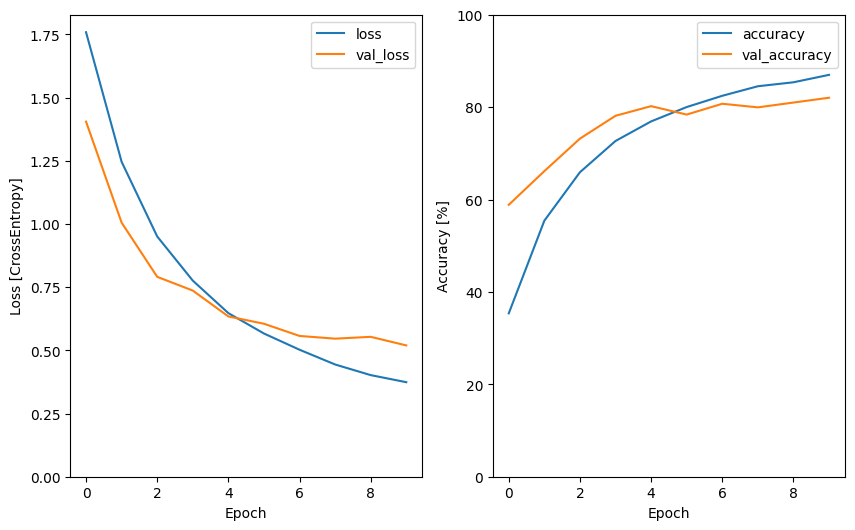

In [27]:
metrics = history.history
plt.close()
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
plt.plot(history.epoch, metrics['loss'], metrics['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.ylim([0, max(plt.ylim())])
plt.xlabel('Epoch')
plt.ylabel('Loss [CrossEntropy]')

plt.subplot(1,2,2)
plt.plot(history.epoch, 100*np.array(metrics['accuracy']), 100*np.array(metrics['val_accuracy']))
plt.legend(['accuracy', 'val_accuracy'])
plt.ylim([0, 100])
plt.xlabel('Epoch')
plt.ylabel('Accuracy [%]')

In [28]:
model.evaluate(test_spectrogram_ds, return_dict=True)

13/13 [==============================] - 1s 61ms/step - loss: 0.5165 - accuracy: 0.8209


{'loss': 0.516525149345398, 'accuracy': 0.8209134340286255}

`model.evaluate(test_spectrogram_ds, return_dict=True)`: مدل رو بر روی مجموعه داده آزمون (test_spectrogram_ds) ارزیابی میکنه و معیارهای ارزیابی رو به صورت یک دیکشنری باز میگردونه.``

In [29]:
y_pred = model.predict(test_spectrogram_ds)

13/13 [==============================] - 0s 19ms/step


In [30]:
y_pred = tf.argmax(y_pred, axis=1)
y_true = tf.concat(list(test_spectrogram_ds.map(lambda s,lab: lab)), axis=0)

`y_pred = tf.argmax(y_pred, axis=1)`: پیش‌بینی‌های مدل (y_pred) رو به برچسب‌های کلاس پیش‌بینی شده تبدیل میکنه با انتخاب شدن اندیس با بیشترین مقدار در طول محور ۱.

`y_true = tf.concat(list(test_spectrogram_ds.map(lambda s,lab: lab)), axis=0)`: برچسب‌های واقعی از مجموعه داده آزمون (test_spectrogram_ds) رو به یک تانسور تکی ادغام میکنه.

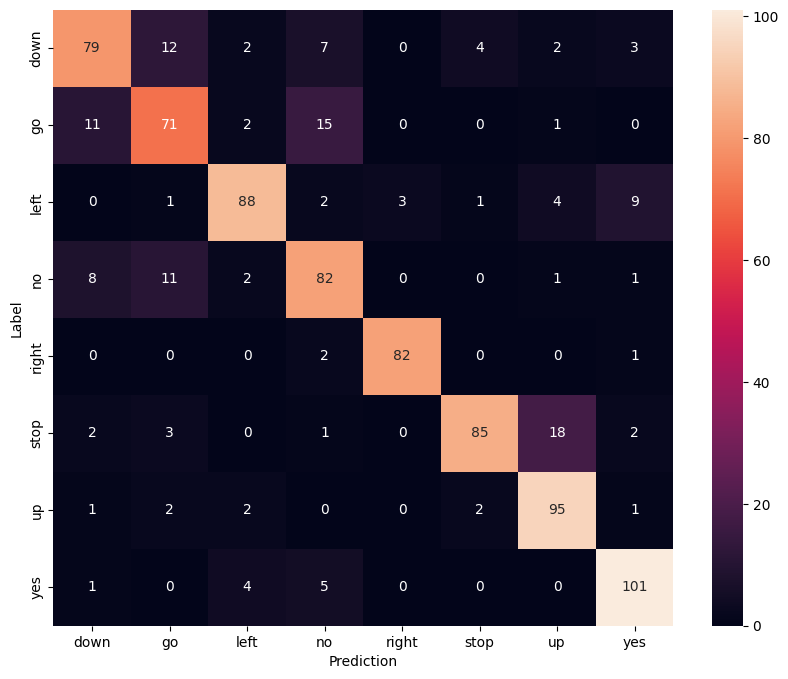

In [31]:
confusion_mtx = tf.math.confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_mtx,
            xticklabels=label_names,
            yticklabels=label_names,
            annot=True, fmt='g')
plt.xlabel('Prediction')
plt.ylabel('Label')
plt.show()

`confusion_mtx = tf.math.confusion_matrix(y_true, y_pred)`: Computes the confusion matrix based on the true labels (y_true) and predicted labels (y_pred).

`plt.figure(figsize=(10, 8))`: Creates a new figure with a specified size.

`sns.heatmap(...)`: Plots a heatmap using Seaborn, visualizing the confusion matrix.

`xticklabels=label_names, yticklabels=label_names`: Sets the class names as labels for the x and y axes.

`annot=True, fmt='g'`: Displays the values in each cell of the heatmap and formats them as integers.

`plt.xlabel('Prediction')`: Sets the x-axis label as "Prediction".

`plt.ylabel('Label')`: Sets the y-axis label as "Label".

`plt.show()`: Displays the heatmap.

`confusion_mtx = tf.math.confusion_matrix(y_true, y_pred)`: ماتریس ابهام رو بر اساس برچسب‌های واقعی (y_true) و برچسب‌های پیش‌بینی شده (y_pred) محاسبه میکنه.

`plt.figure(figsize=(10, 8))`: یک شکل جدید با اندازه مشخص ایجاد میکنه.

`sns.heatmap(...)`: یک نمودار حرارتی با استفاده از Seaborn رسم میکنه که ماتریس ابهام رو نمایش میده.

`xticklabels=label_names, yticklabels=label_names`: نام کلاس‌ها رو به عنوان برچسب برای محور x و y تنظیم میکنه.

`annot=True, fmt='g'`: مقادیر در هر سلول از نمودار حرارتی رو نمایش میده و اونها رو به صورت اعداد صحیح فرمت میکنه.

`plt.xlabel('Prediction')`: برچسب محور x رو به "Prediction" تنظیم میکنه.

`plt.ylabel('Label')`: برچسب محور y رو به "Label" تنظیم میکنه.

`plt.show()`: نمودار حرارتی رو نمایش میده.

### Part 7: Model Prediction on New Audio Samples

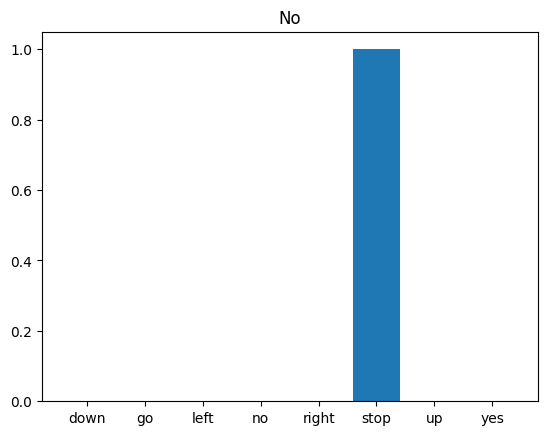

In [32]:
import IPython.display
 
x = data_dir/'stop/1c45ceb2_nohash_1.wav'
x = tf.io.read_file(str(x))


plt.close()

x, sample_rate = tf.audio.decode_wav(x, desired_channels=1, desired_samples=16000,)
x = tf.squeeze(x, axis=-1)
waveform = x
x = get_spectrogram(x)
x = x[tf.newaxis,...]

prediction = model(x)
x_labels = label_names
plt.close()
plt.bar(x_labels, tf.nn.softmax(prediction[0]))
plt.title('No')
plt.show()

display.display(display.Audio(waveform, rate=16000,autoplay=True))

`x = data_dir/'stop/1c45ceb2_nohash_1.wav'`: Defines the path to a sample audio file.

`x = tf.io.read_file(str(x))`: Reads the content of the audio file.

`x, sample_rate = tf.audio.decode_wav(x, desired_channels=1, desired_samples=16000,)`: Decodes the audio file, specifying the desired number of channels and samples.

`x = tf.squeeze(x, axis=-1)`: Removes the singleton dimension to obtain a 1D waveform.

`waveform = x`: Stores the waveform for later visualization.

`x = get_spectrogram(x)`: Computes the spectrogram of the audio waveform.

`x = x[tf.newaxis,...]`: Adds a new axis to the spectrogram for batch dimension.

`prediction = model(x)`: Uses the trained model to predict the class probabilities for the input spectrogram.

`plt.bar(x_labels, tf.nn.softmax(prediction[0]))`: Plots a bar chart representing the softmax probabilities of each class.

`plt.title('No')`: Sets the title of the chart.

`plt.show()`: Displays the bar chart.

`display.display(display.Audio(waveform, rate=16000,autoplay=True))`: Displays an interactive audio player for the original waveform.

`x = data_dir/'stop/1c45ceb2_nohash_1.wav'`: مسیر یک فایل صوتی نمونه رو تعریف میکنه.

`x = tf.io.read_file(str(x))`: محتوای فایل صوتی رو میخونه.

`x, sample_rate = tf.audio.decode_wav(x, desired_channels=1, desired_samples=16000,)`: فایل صوتی رو رمزگشایی  کرده و تعداد مورد نظر کانال‌ها و نمونه‌ها رو مشخص میکنه.

`x = tf.squeeze(x, axis=-1)`: بعد تک جابجا شده رو حذف کرده تا یک موج شکل‌دهی شده ۱‌بعدی به دست بیاد.

`waveform = x`: موج شکل‌دهی رو برای نمایش بعدی ذخیره میکنه.

`x = get_spectrogram(x)`: اسپکتروگرام موج صوتی رو محاسبه میکنه.

`x = x[tf.newaxis,...]`: یک محور جدید به اسپکتروگرام برای ابعاد دسته افزوده میکنه.

`prediction = model(x)`: از مدل آموزش دیده برای پیش‌بینی احتمالات کلاس برای اسپکتروگرام ورودی استفاده میشه.

`plt.bar(x_labels, tf.nn.softmax(prediction[0]))`: یک نمودار میله‌ای رو که احتمالات softmax هر کلاس رو نشان میده، رسم میکنه.

`plt.title('No')`: عنوان نمودار رو تنظیم میکنه.

`plt.show()`: نمودار میله‌ای رو نمایش میده.

`display.display(display.Audio(waveform, rate=16000,autoplay=True))`: یک پخش‌کننده صوت تعاملی برای موج شکل‌دهی اصلی رو نمایش میده.

### Part 8: Model Prediction on Another Audio Sample

In [33]:
import IPython.display
 
x = 'data/stop/8a28231e_nohash_0.wav'
x = tf.io.read_file(str(x))
x, sample_rate = tf.audio.decode_wav(x, desired_channels=1, desired_samples=16000,)
x = tf.squeeze(x, axis=-1)
waveform = x
display.display(display.Audio(waveform, rate=16000,autoplay=True))

`x = 'data/stop/8a28231e_nohash_0.wav'`: Specifies the path to another sample audio file.

`x = tf.io.read_file(str(x))`: Reads the content of the audio file.

`x, sample_rate = tf.audio.decode_wav(x, desired_channels=1, desired_samples=16000,)`: Decodes the audio file with the desired number of channels and samples.

`x = tf.squeeze(x, axis=-1)`: Removes the singleton dimension to get a 1D waveform.

`waveform = x`: Stores the waveform for later display.

`display.display(display.Audio(waveform, rate=16000,autoplay=True))`: Displays an interactive audio player for the waveform.

`x = 'data/stop/8a28231e_nohash_0.wav'`: مسیر یک فایل صوتی نمونه دیگر رو مشخص میکنه.

`x = tf.io.read_file(str(x))`: محتوای فایل صوتی رو میخونه.

`x, sample_rate = tf.audio.decode_wav(x, desired_channels=1, desired_samples=16000,)`: فایل صوتی رو با تعداد مورد نظر کانال‌ها و نمونه‌ها رمزگشایی میکنه.

`x = tf.squeeze(x, axis=-1)`: بعد تک جابجا شده رو حذف میکنه تا یک موج شکل‌دهی شده ۱‌بعدی به دست بیاد.

`waveform = x`: موج شکل‌دهی رو برای نمایش بعدی ذخیره میکنه.

`display.display(display.Audio(waveform, rate=16000,autoplay=True))`: یک پخش‌کننده صوت تعاملی برای موج شکل‌دهی.

### Part 9: Checking IPython Version

In [34]:
IPython.__version__

'8.12.3'

`IPython.__version__`: this command used to be for check the version of IPython

`IPython.__version__`: از این دستور برای چک کردن ورژن IPython استفاده میشه

### Part 10: Additional - Saving Model Weights

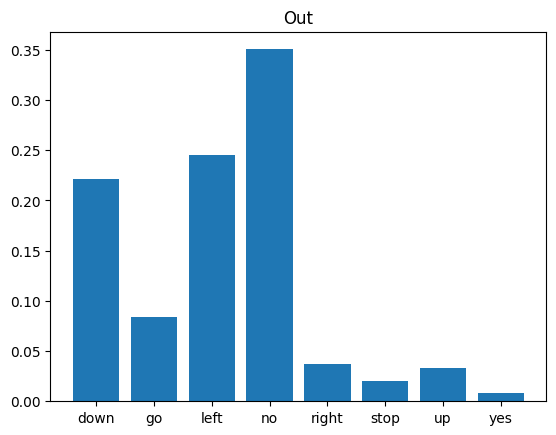

In [35]:
import wave
import pyaudio
p = pyaudio.PyAudio()
sabad = 16000
stream = p.open(format=pyaudio.paInt16, channels=1, rate=16000,
                input=True, frames_per_buffer=sabad)
a = stream.read(sabad)

wf = wave.open("majid.wav", 'wb')
wf.setnchannels(1)
wf.setsampwidth(p.get_sample_size(pyaudio.paInt16))
wf.setframerate(16000)
wf.writeframes(b''.join([a]))
wf.close()

x = 'majid.wav'
x = tf.io.read_file(str(x))


x, sample_rate = tf.audio.decode_wav(
    x, desired_channels=1, desired_samples=16000,)
x = tf.squeeze(x, axis=-1)
waveform = x
x = get_spectrogram(x)
x = x[tf.newaxis, ...]

prediction = model(x)
x_labels = label_names
plt.close()
plt.bar(x_labels, tf.nn.softmax(prediction[0]))
plt.title('Out')
plt.show()

`import wave, pyaudio`: Imports the necessary libraries for working with audio.

`p = pyaudio.PyAudio()`: Initializes the PyAudio object.

`sabad = 16000`: Specifies the number of frames to be recorded.

`stream = p.open(format=pyaudio.paInt16, channels=1, rate=16000, input=True, frames_per_buffer=sabad)`: Opens an audio stream for recording.

`a = stream.read(sabad)`: Reads audio frames from the stream.

`wf = wave.open("majid.wav", 'wb')`: Opens a WAV file in write mode.

`wf.setnchannels(1)`: Sets the number of channels in the WAV file.

`wf.setsampwidth(p.get_sample_size(pyaudio.paInt16))`: Sets the sample width based on the PyAudio format.

`wf.setframerate(16000)`: Sets the frame rate for the WAV file.

`wf.writeframes(b''.join([a]))`: Writes the audio frames to the WAV file.

`wf.close()`: Closes the WAV file.

`x = 'majid.wav'`: Specifies the path to the recorded audio file.

`x = tf.io.read_file(str(x))`: Reads the content of the audio file.

`x, sample_rate = tf.audio.decode_wav(x, desired_channels=1, desired_samples=16000,)`: Decodes the audio file.

`x = tf.squeeze(x, axis=-1)`: Removes the singleton dimension.

`waveform = x`: Stores the waveform for later display.

`x = get_spectrogram(x)`: Computes the spectrogram of the audio waveform.

`x = x[tf.newaxis, ...]`: Adds a new axis for batch dimension.

`prediction = model(x)`: Uses the trained model to predict class probabilities.

`plt.bar(x_labels, tf.nn.softmax(prediction[0]))`: Plots a bar chart representing softmax probabilities.

`plt.title('Out')`: Sets the title of the chart.

`plt.show()`: Displays the bar chart.

`import wave, pyaudio`: کتابخانه‌های مورد نیاز برای کار با صدا رو وارد میکنه.

`p = pyaudio.PyAudio()`: شی PyAudio رو مقداردهی اولیه میکنه.

`sabad = 16000`: تعداد فریم‌هایی که قراره ضبط بشن رو مشخص میکنه.

`stream = p.open(format=pyaudio.paInt16, channels=1, rate=16000, input=True, frames_per_buffer=sabad)`: یک جریان صوتی برای ضبط باز میکنه.

`a = stream.read(sabad)`: فریم‌های صوتی رو از جریان میخونه.

`wf = wave.open("majid.wav", 'wb')`: یک فایل WAV رو در حالت خواندن باز میکنه.

`wf.setnchannels(1)`: تعداد کانال‌ها رو در فایل WAV تنظیم میکنه.

`wf.setsampwidth(p.get_sample_size(pyaudio.paInt16))`: عرض نمونه رو بر اساس فرمت PyAudio تنظیم میکنه.

`wf.setframerate(16000)`: نرخ فریم برای فایل WAV رو تعیین میکنه.

`wf.writeframes(b''.join([a]))`: فریم‌های صوتی رو در فایل WAV مینویسه.

`wf.close()`: فایل WAV رو میبنده.

`x = 'majid.wav'`: مسیر فایل صوتی ضبط شده رو مشخص میکنه.

`x = tf.io.read_file(str(x))`: محتوای فایل صوتی رو میخونه.

`x, sample_rate = tf.audio.decode_wav(x, desired_channels=1, desired_samples=16000,)`: فایل صوتی رو رمزگشایی میکنه.

`x = tf.squeeze(x, axis=-1)`: بعد تک رو حذف میکنه.

`waveform = x`: موج شکل‌دهی رو برای نمایش بعدی ذخیره میکنه.

`x = get_spectrogram(x)`: اسپکتروگرام موج صوتی رو محاسبه میکنه.

`x = x[tf.newaxis, ...]`: یک محور جدید برای بعد دسته رو اضافه میکنه.

`prediction = model(x)`: از مدل آموزش‌دیده برای پیش‌بینی احتمالات کلاس استفاده میکنه.

`plt.bar(x_labels, tf.nn.softmax(prediction[0]))`: یک نمودار میله‌ای که احتمالات softmax رو نشون میده رو رسم میکنه.

`plt.title('Out')`: عنوان چارت رو تنظیم میکنه.

`plt.show()`: چارت میله‌ای رو نمایش میده.

In [36]:
model.save_weights('model.h5')

`model.save_weights('model.h5')`: Saves the weights of the trained model to a file named 'model.h5'. This is a common practice to store the learned parameters of the model so that it can be later loaded and used without retraining.

`model.save_weights('model.h5')`: وزن‌های مدل آموزش‌دیده رو در یک فایل به نام 'model.h5' ذخیره میکنه. این یک عمل معمول است تا پارامترهای یادگیری شده مدل ذخیره شده و در آینده بتواند بدون نیاز به دوباره آموزش مجدد، بارگذاری و استفاده بشن.